<a href="https://colab.research.google.com/github/Ashley-Soderlund/Google-Colab-Wine-Quality/blob/main/Team1_Wine_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np  # For array manipulation
import pandas as pd # For easily viewing and manipulating dataframes
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline

from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import *

#Loading Dataset and Understanding Attributes

In [ ]:
#Creation of wine dataset from the csv file
wine = pd.read_csv('../content/sample_data/winequality-red.csv', sep=';')

In [ ]:
#See more information about attributes in wine dataset
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
#Gets first five values of dataset
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#More information on attributes in dataset
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


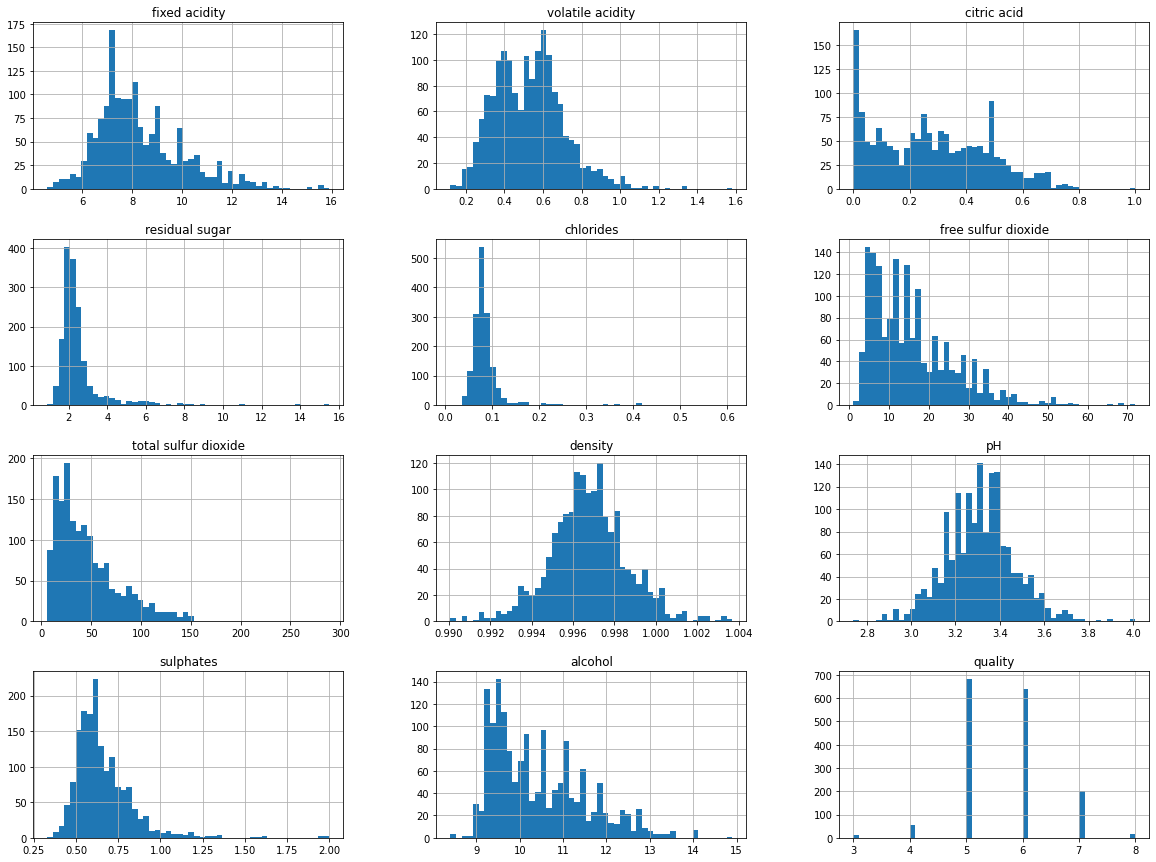

In [ ]:
#Visualize value spread of each attribute
wine.hist(bins=50, figsize=(20,15))
plt.show()

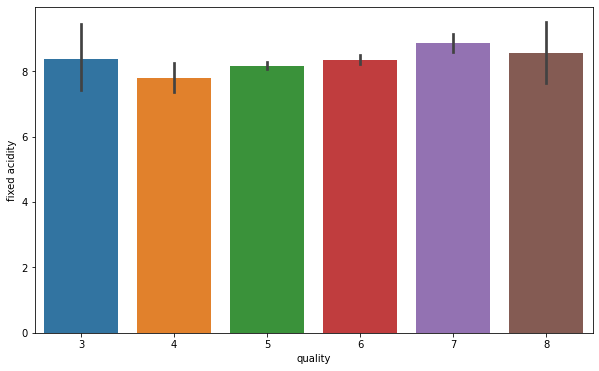

In [ ]:
#Fixed acitidty has no affect on quality result
fig = plt.figure(figsize = (10,6))
sns.barplot(x='quality', y = 'fixed acidity', data = wine)

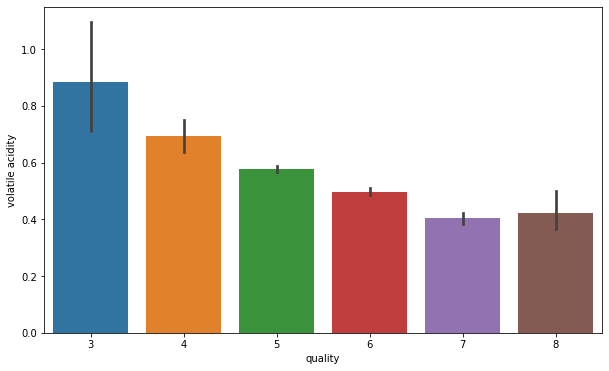

In [ ]:
#Wines of higher quality have less volatile acidity in them
fig = plt.figure(figsize = (10,6))
sns.barplot(x='quality', y = 'volatile acidity', data = wine)

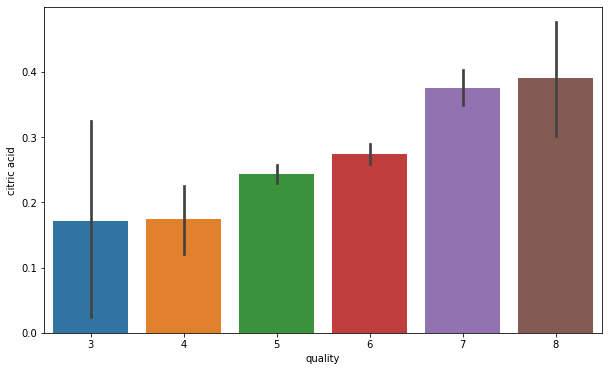

In [ ]:
#Wines with more citric acid are higher in quality
fig = plt.figure(figsize = (10,6))
sns.barplot(x='quality', y = 'citric acid', data = wine)

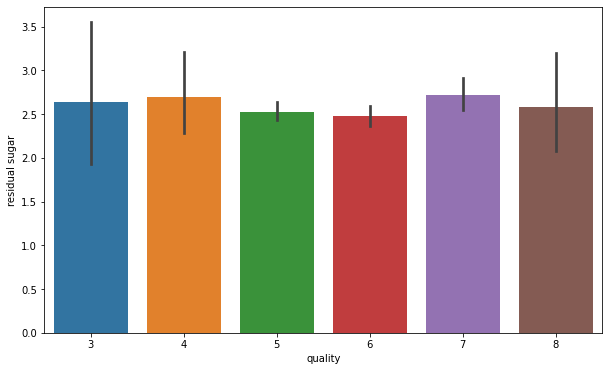

In [ ]:
#No trends in the level of residual sugar
fig = plt.figure(figsize = (10,6))
sns.barplot(x='quality', y = 'residual sugar', data = wine)

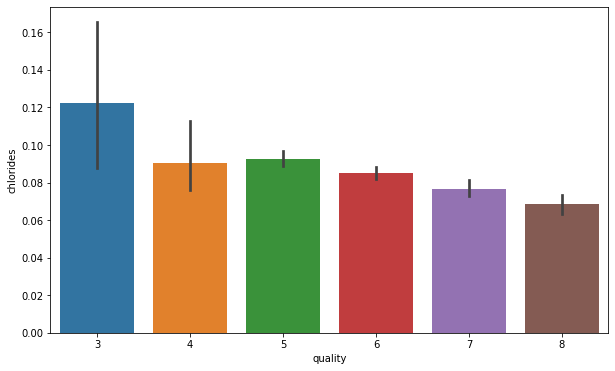

In [ ]:
#Wines with less chlorides have a higher wine quality
fig = plt.figure(figsize = (10,6))
sns.barplot(x='quality', y = 'chlorides', data = wine)

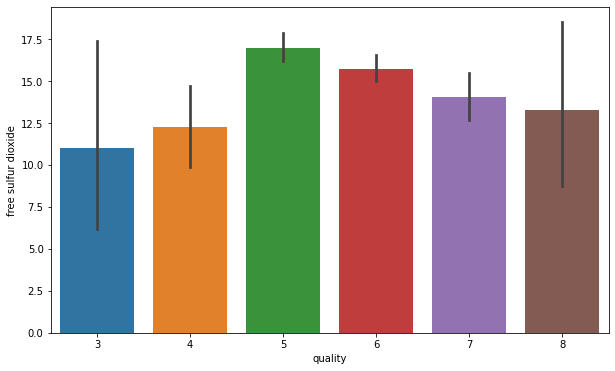

In [ ]:
#No real trends in free sulfur dioxide
fig = plt.figure(figsize = (10,6))
sns.barplot(x='quality', y = 'free sulfur dioxide', data = wine)

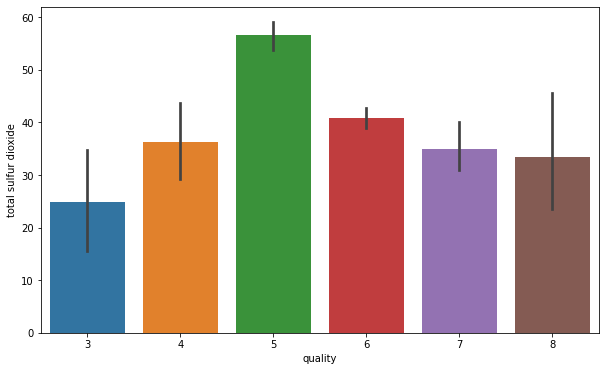

In [ ]:
#No real trends in total sulfur dioxide
fig = plt.figure(figsize = (10,6))
sns.barplot(x='quality', y = 'total sulfur dioxide', data = wine)

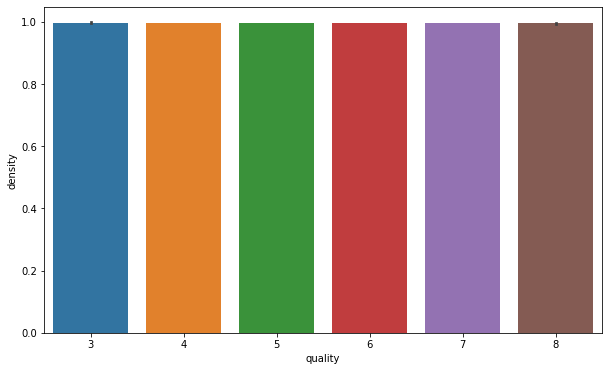

In [ ]:
#No trend in density
fig = plt.figure(figsize = (10,6))
sns.barplot(x='quality', y = 'density', data = wine)

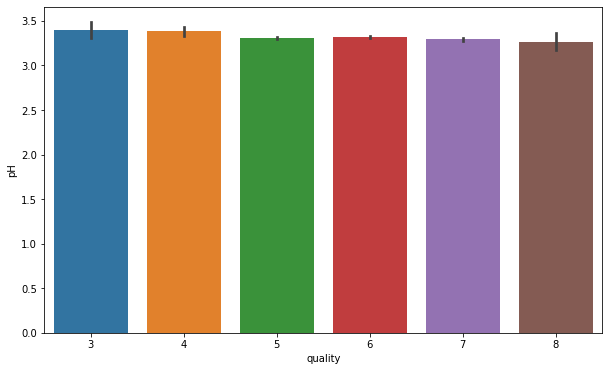

In [ ]:
#No trend in pH levels
fig = plt.figure(figsize = (10,6))
sns.barplot(x='quality', y = 'pH', data = wine)

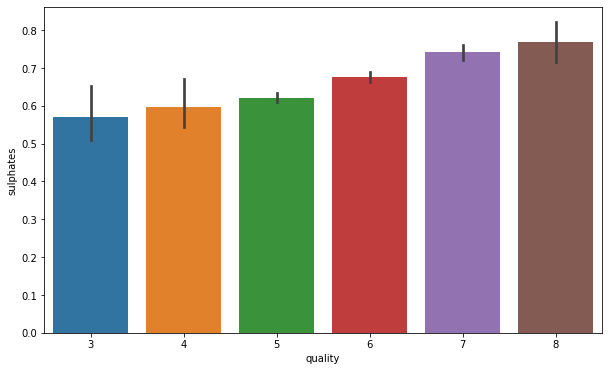

In [ ]:
#Wines with higher levels of sulphates are higher in quality
fig = plt.figure(figsize = (10,6))
sns.barplot(x='quality', y = 'sulphates', data = wine)

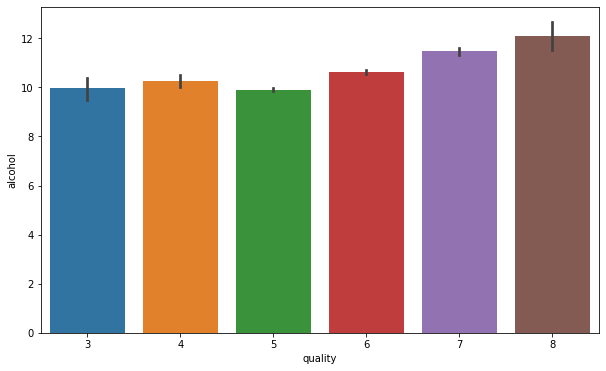

In [ ]:
#Wines with more alcohol are higher in quality
fig = plt.figure(figsize = (10,6))
sns.barplot(x='quality', y = 'alcohol', data = wine)

In [ ]:
#Check for missing data
wine.isnull().any().any()

False

#Creation of Testing and Training Sets

In [ ]:
X=wine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
y= wine["quality"]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

#Methods

##Multiple Linear Regression

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)

NameError: ignored

In [ ]:
some_data = X_train.iloc[:5]
some_labels = y_train.iloc[:5]

print("Predictions:", regr.predict(some_data))

In [ ]:
some_labels

In [ ]:
linear_prediction = regr.predict(X_test)

In [ ]:
sns.distplot((linear_prediction-y_test))

In [ ]:
plt.scatter(y_test,linear_prediction)

Finding Error of Linear Regression Method

In [ ]:
mae=metrics.mean_absolute_error(y_test,linear_prediction)
mse=metrics.mean_squared_error(y_test,linear_prediction)
rmse=np.sqrt(metrics.mean_squared_error(y_test,linear_prediction))

NameError: ignored

In [ ]:
print("Mean Absolute Error of Linear Regression is ", mae)

In [ ]:
print("Mean Squared Error of Linear Regression is ", mse)

In [ ]:
print("Root Mean Squared Error of Linear Regression is ", rmse)

NameError: ignored

##Decision Tree Classifier

In [ ]:
tree = DecisionTreeClassifier()

In [ ]:
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
tree_prediction = tree.predict(X_test)

In [ ]:
print(classification_report(y_test, tree_prediction))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.10      0.12      0.11        17
           5       0.69      0.67      0.68       204
           6       0.64      0.65      0.64       193
           7       0.48      0.53      0.50        59
           8       0.00      0.00      0.00         4

    accuracy                           0.61       480
   macro avg       0.32      0.33      0.32       480
weighted avg       0.61      0.61      0.61       480



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(confusion_matrix(y_test, tree_prediction))

[[  0   1   1   1   0   0]
 [  0   2   9   4   2   0]
 [  0  11 136  44  13   0]
 [  0   2  46 125  17   3]
 [  0   4   5  19  31   0]
 [  0   0   0   2   2   0]]


Finding Error of Decision Tree Classifier

In [ ]:
mae=metrics.mean_absolute_error(y_test,tree_prediction)
mse=metrics.mean_squared_error(y_test,tree_prediction)
rmse=np.sqrt(metrics.mean_squared_error(y_test,tree_prediction))

In [ ]:
print("Mean Absolute Error of Decision Tree Classifier is ", mae)

Mean Absolute Error of Linear Regression is  0.4791666666666667


In [ ]:
print("Mean Absolute Error of Decision Tree Classifier is ", mse)

Mean Absolute Error of Decision Tree Classifier is  0.6916666666666667


In [ ]:
print("Mean Absolute Error of Decision Tree Classifier is ", rmse)

Mean Absolute Error of Decision Tree Classifier is  0.83166499665831


##Random Forest Classifier

In [ ]:
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
forest_prediction = forest.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, forest_prediction))

[[  0   0   2   1   0   0]
 [  0   0  11   5   1   0]
 [  0   0 163  38   3   0]
 [  0   0  44 135  14   0]
 [  0   0   1  27  31   0]
 [  0   0   0   1   3   0]]


In [ ]:
print(classification_report(y_test,forest_prediction))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        17
           5       0.74      0.80      0.77       204
           6       0.65      0.70      0.68       193
           7       0.60      0.53      0.56        59
           8       0.00      0.00      0.00         4

    accuracy                           0.69       480
   macro avg       0.33      0.34      0.33       480
weighted avg       0.65      0.69      0.67       480



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Finding Error of Random Forest Classifier

In [ ]:
mae=metrics.mean_absolute_error(y_test,forest_prediction)
mse=metrics.mean_squared_error(y_test,forest_prediction)
rmse=np.sqrt(metrics.mean_squared_error(y_test,forest_prediction))

In [ ]:
print("Mean Absolute Error of Random Forest Classifier is ", mae)

Mean Absolute Error of Random Forest Classifier is  0.34791666666666665


In [ ]:
print("Mean Absolute Error of Random Forest Classifier is ", mse)

Mean Absolute Error of Random Forest Classifier is  0.42291666666666666


In [ ]:
print("Mean Absolute Error of Random Forest Classifier is ", rmse)

Mean Absolute Error of Random Forest Classifier is  0.6503204338375557
